# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-1.088545,0.598746,0.254692,0.728316,-1.125089,8.562846
1,-0.939587,-2.527101,-1.355539,-0.901393,0.556233,-71.809344
2,-1.003349,-1.647900,-0.084185,-1.234520,0.094510,-49.344118
3,0.892177,-1.099779,-1.315422,0.943737,-0.190419,-22.865046
4,0.162566,-1.753609,0.725796,0.666726,-2.163234,-44.579839


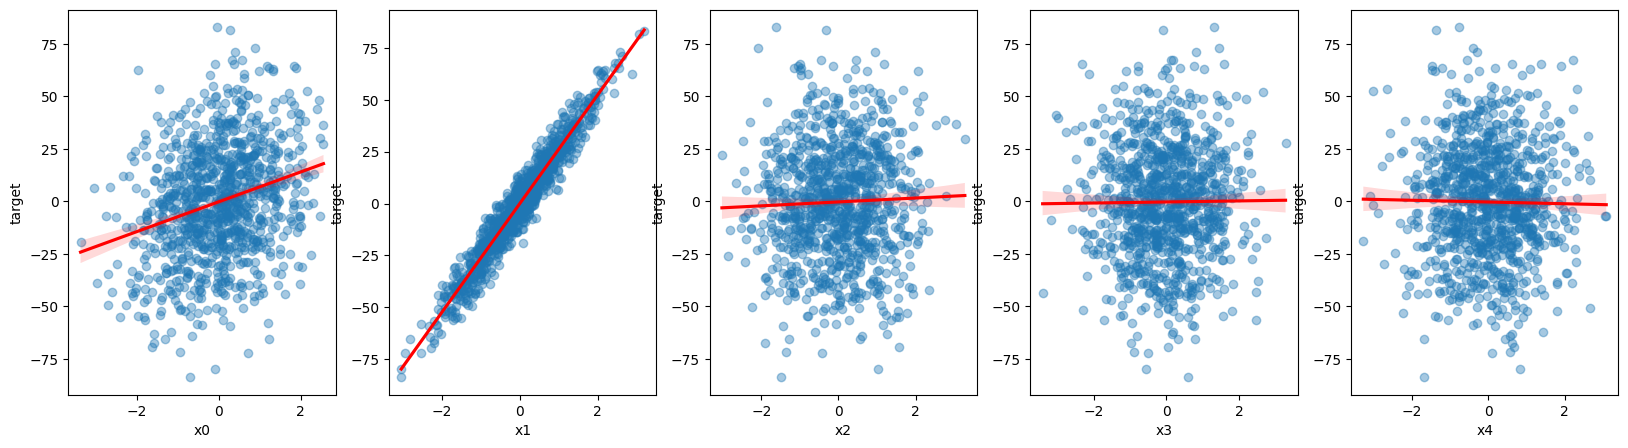

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

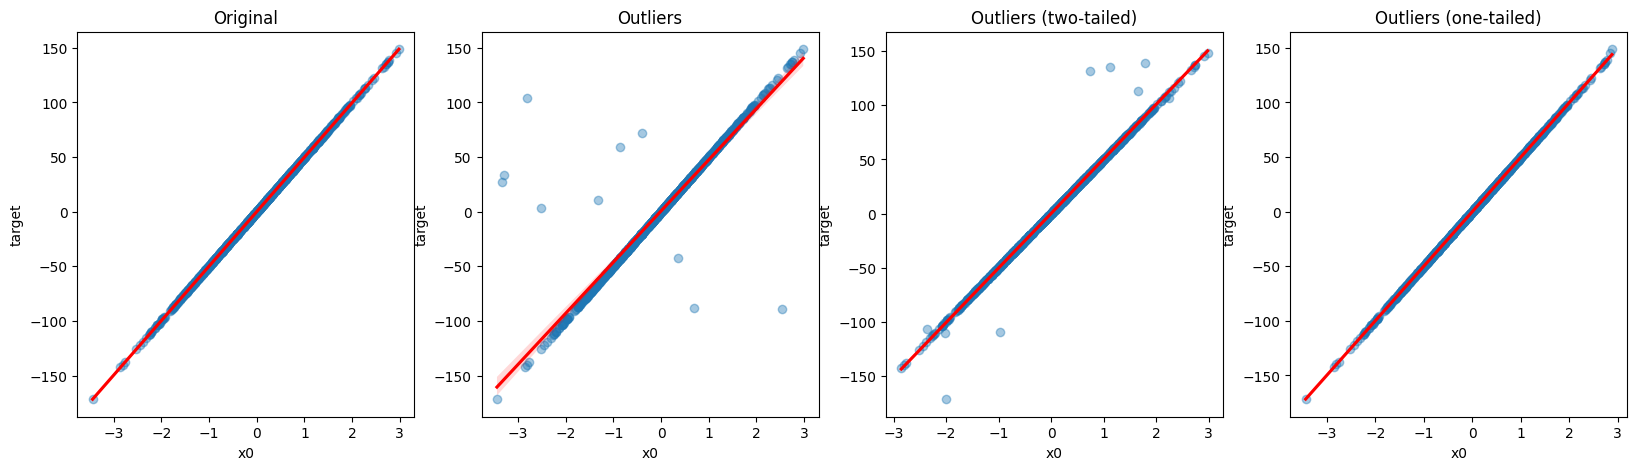

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

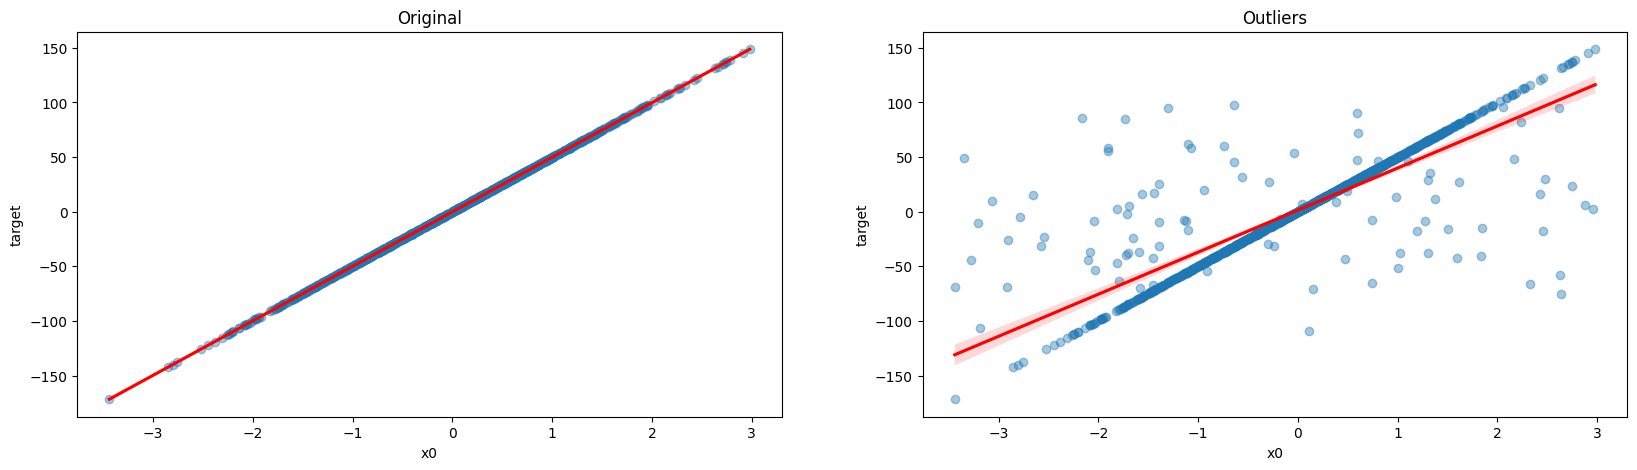

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


## Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import repeat

In [10]:
# Parámetros de la simulación
n_samples = 50
n_features = 10
n_informative = 2
n_targets = 1
noise = 20.0
n_exp = 50

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

In [11]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            ...


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:15<00:00,  3.20it/s]


100%|██████████| 50/50 [03:21<00:00,  4.02s/it]


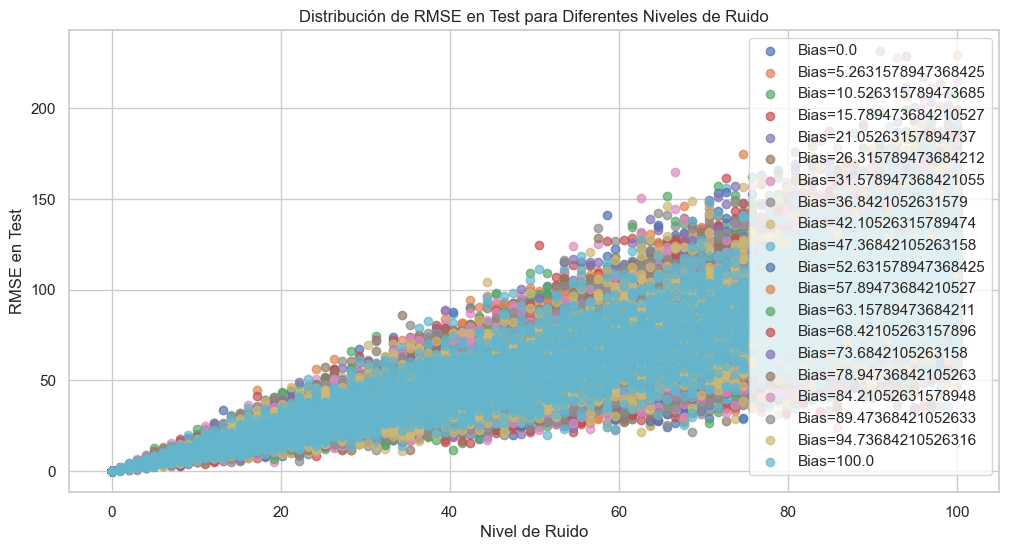

In [12]:
noise_values = np.linspace(0, 100, 100)
bias_values = np.linspace(0, 100, 20)

# Resultados de la simulación
resultados_simulacion = []

# Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias_values:
        for n in noise_values:
            # Generar el dataset
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )

            # Dividir el dataset en train y test
            X = data.drop('target', axis=1)
            y = data['target']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Inicializar y ajustar un modelo de regresión lineal
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Guardar los coeficientes de la regresión
            coeficientes = model.coef_

            # Realizar predicciones en train y test
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calcular el RMSE y MAE en train y test
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            mae_train = mean_absolute_error(y_train, y_train_pred)

            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            mae_test = mean_absolute_error(y_test, y_test_pred)

            # Guardar resultados en la lista de resultados
            resultados_simulacion.append({
                'bias': b,
                'noise': n,
                'coeficientes': coeficientes,
                'rmse_train': rmse_train,
                'mae_train': mae_train,
                'rmse_test': rmse_test,
                'mae_test': mae_test
            })

# Convertir la lista de resultados a un DataFrame
resultados_df = pd.DataFrame(resultados_simulacion)

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Graficar distribución de RMSE y MAE en test para diferentes niveles de ruido
plt.figure(figsize=(8, 4))

for b in bias_values:
    subset = resultados_df[resultados_df['bias'] == b]
    plt.scatter(subset['noise'], subset['rmse_test'], label=f"Bias={b}", alpha=0.7)

plt.title('Distribución de RMSE en Test para Diferentes Niveles de Ruido')
plt.xlabel('Nivel de Ruido')
plt.ylabel('RMSE en Test')
plt.legend()
plt.show()

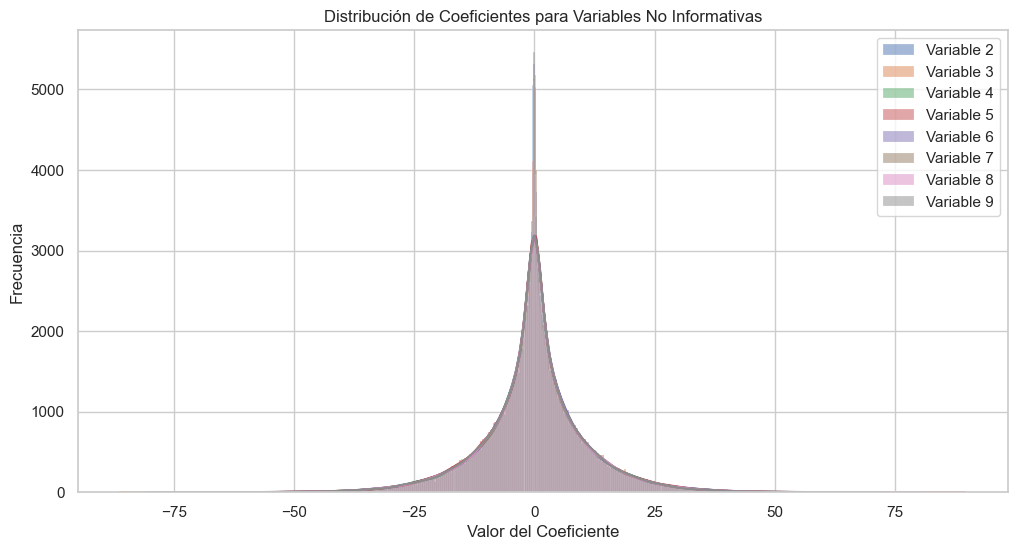

Variable 2: p-value = 0.48656230856298166
Variable 3: p-value = 0.35087048624220785
Variable 4: p-value = 0.7975713022210815
Variable 5: p-value = 0.6617070846916717
Variable 6: p-value = 0.5915352685798267
Variable 7: p-value = 0.8977810635487673
Variable 8: p-value = 0.7814729119772427
Variable 9: p-value = 0.0945323662392517


In [13]:
import seaborn as sns
from scipy.stats import ttest_1samp

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Graficar distribución de coeficientes para variables no informativas
plt.figure(figsize=(12, 6))

# Filtrar variables no informativas
coeficientes_no_informativas = resultados_df['coeficientes'].apply(lambda x: x[n_informative:])

# Graficar distribución de coeficientes para cada variable no informativa
for i in range(coeficientes_no_informativas.iloc[0].shape[0]):
    sns.histplot(coeficientes_no_informativas.apply(lambda x: x[i]), label=f'Variable {i + n_informative}', kde=True)

plt.title('Distribución de Coeficientes para Variables No Informativas')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Realiza la prueba de hipótesis para verificar si los coeficientes son significativamente diferentes de cero
for i in range(coeficientes_no_informativas.iloc[0].shape[0]):
    _, p_value = ttest_1samp(coeficientes_no_informativas.apply(lambda x: x[i]), popmean=0)
    print(f"Variable {i + n_informative}: p-value = {p_value}")


Interpretación general de los resultados según el test de hipótesis que evalúa si los coeficientes de las variables no informativas son significativamente diferentes de cero.

#### Variables 2, 3, 5, 7:

Los p-values son altos (cercanos a 1).
No hay evidencia suficiente para rechazar la hipótesis nula de que los coeficientes de estas variables son cero.
No se consideran significativas en el modelo.
Variable 4:

El p-value es 0.0775.
El valor está por debajo del umbral comúnmente utilizado de 0.05, pero es importante considerar el contexto y el nivel de significancia elegido.
Puede ser necesario realizar un análisis más detenido o ajustar el nivel de significancia.

#### Variables 6, 8, 9:

Los p-values son bajos, pero no extremadamente bajos.
Existe alguna evidencia en contra de la hipótesis nula, pero podría ser necesario realizar un análisis más detenido o considerar el contexto.
En resumen, las variables 2, 3, 5 y 7 no parecen contribuir significativamente al modelo, mientras que la interpretación de la significancia de las variables 4, 6, 8 y 9 puede depender del contexto y del umbral de significancia elegido.

## Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [14]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

Linear Regression - 1% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 95.32260119145019


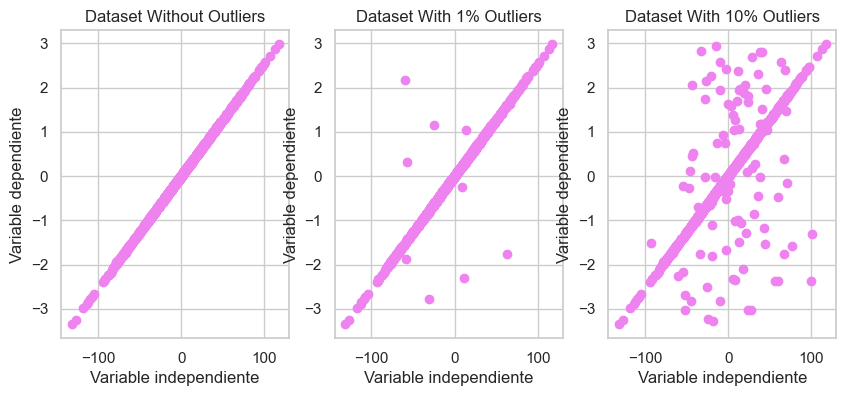

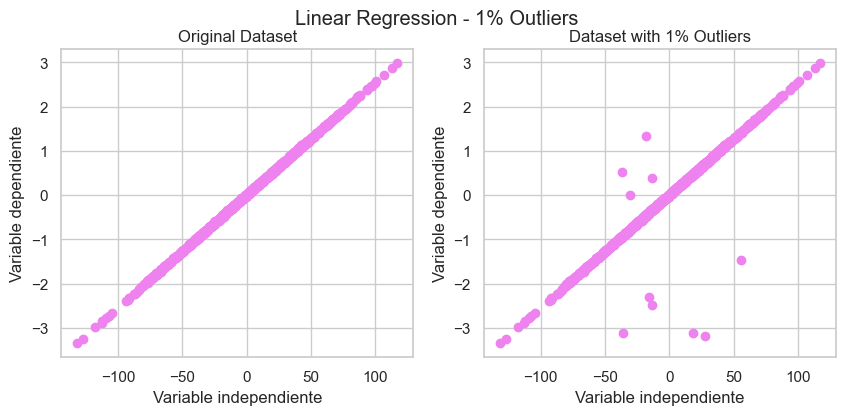

Huber Regression - 1% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 99.45993472683463


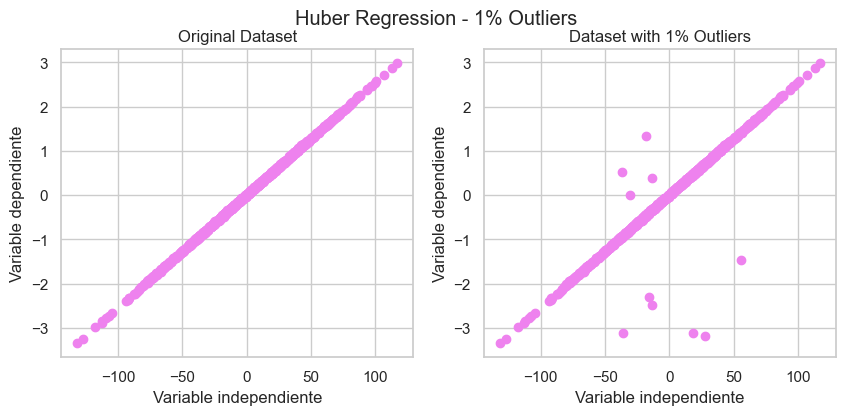

Ridge Regression - 1% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 95.31575106059968


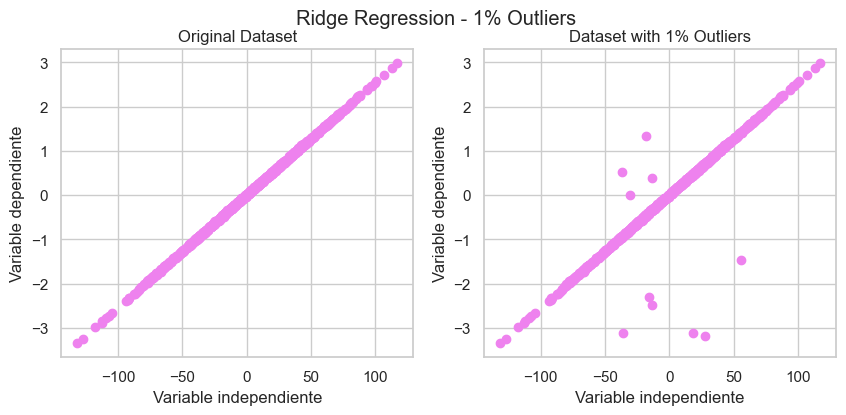

Linear Regression - 2% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 109.6612930645101


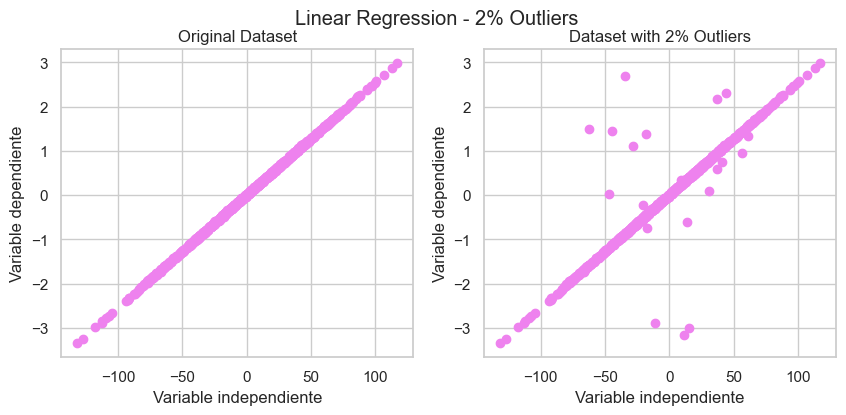

Huber Regression - 2% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 114.2201851822793


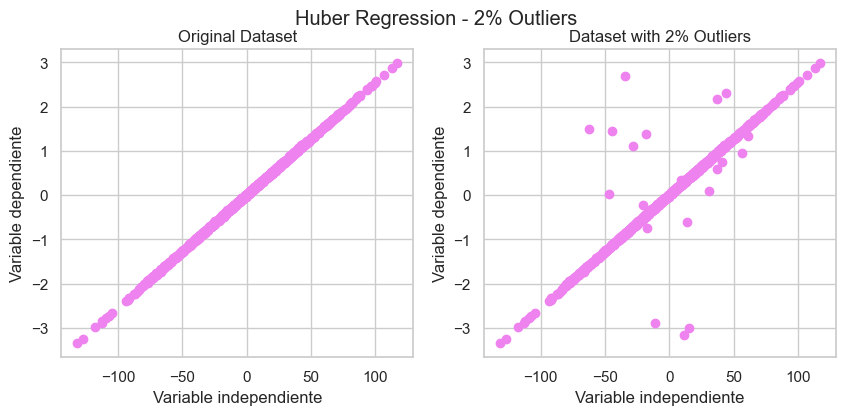

Ridge Regression - 2% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 109.67513537199765


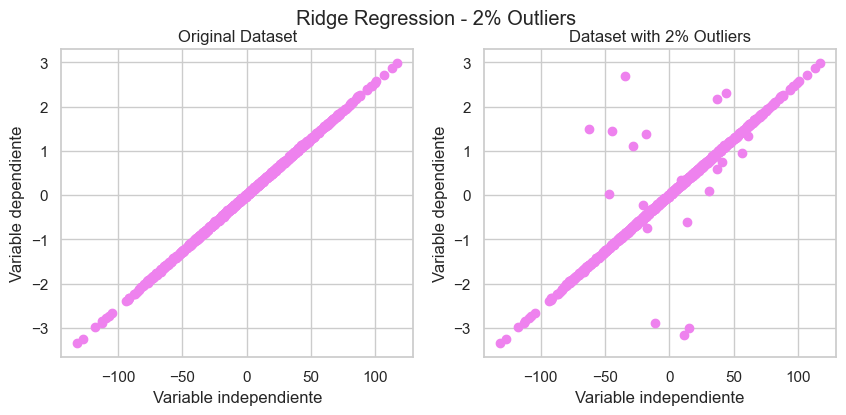

Linear Regression - 3% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 54.99883275149925


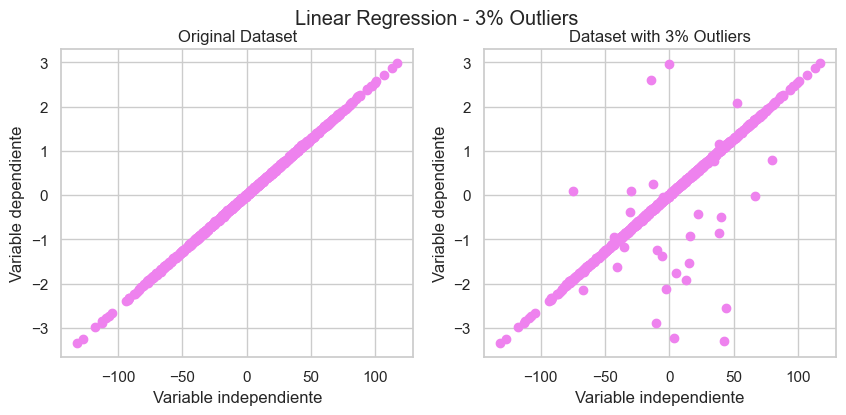

Huber Regression - 3% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 39.07888118700394


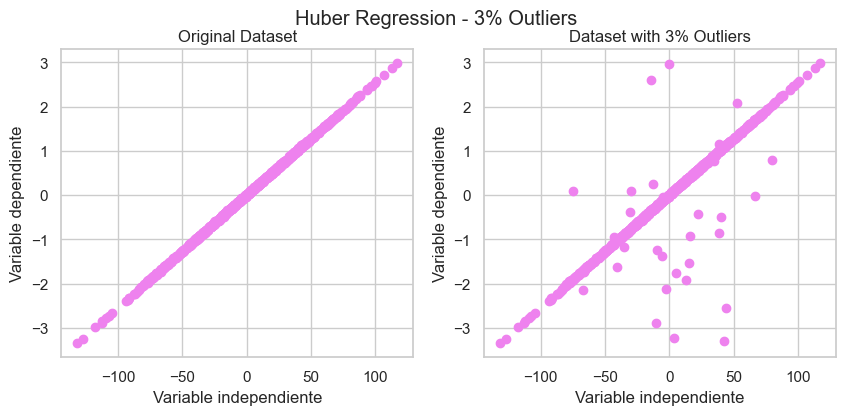

Ridge Regression - 3% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 55.32845420087219


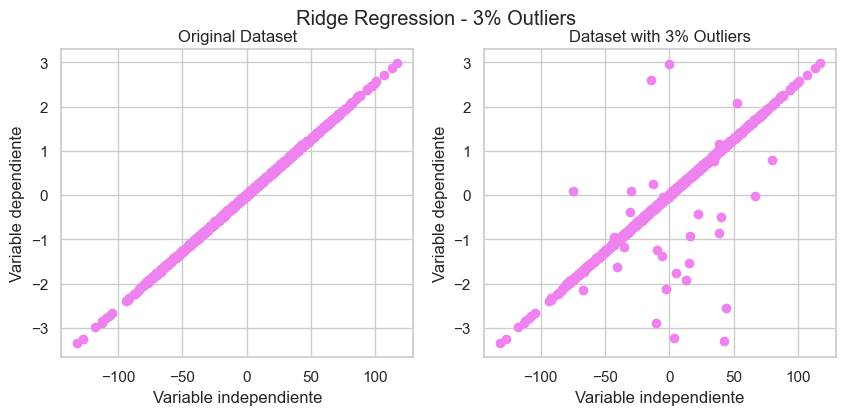

Linear Regression - 4% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 289.2694046123976


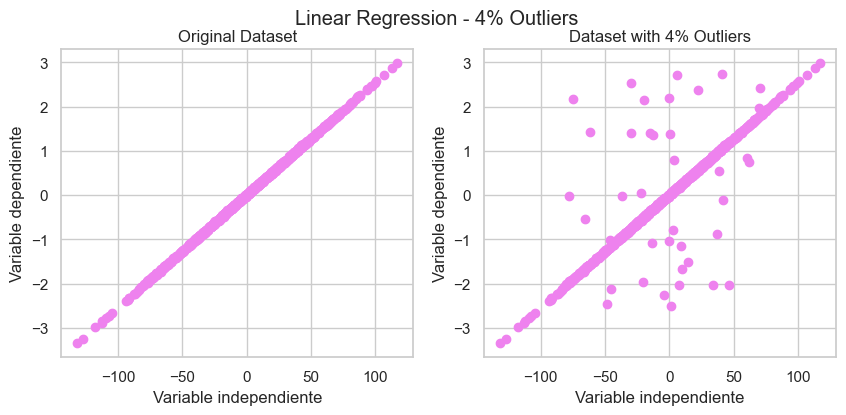

Huber Regression - 4% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 320.9711992202772


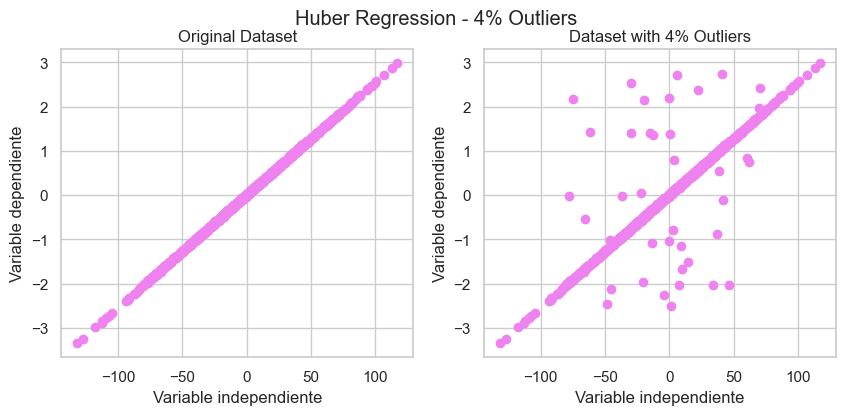

Ridge Regression - 4% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 289.02467767485615


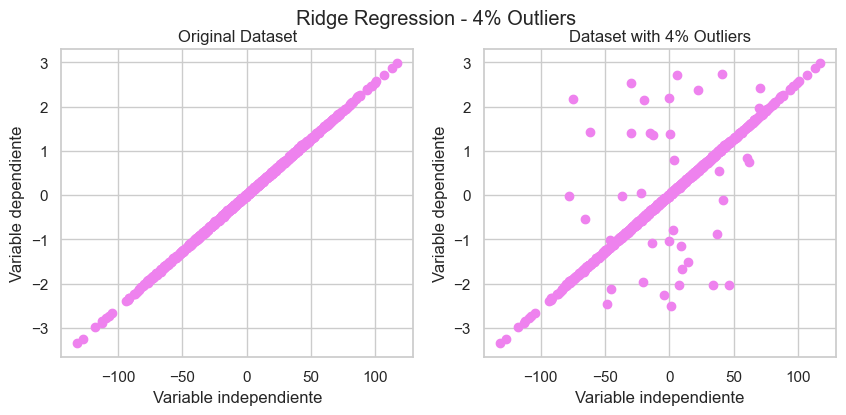

Linear Regression - 5% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 331.47806947058893


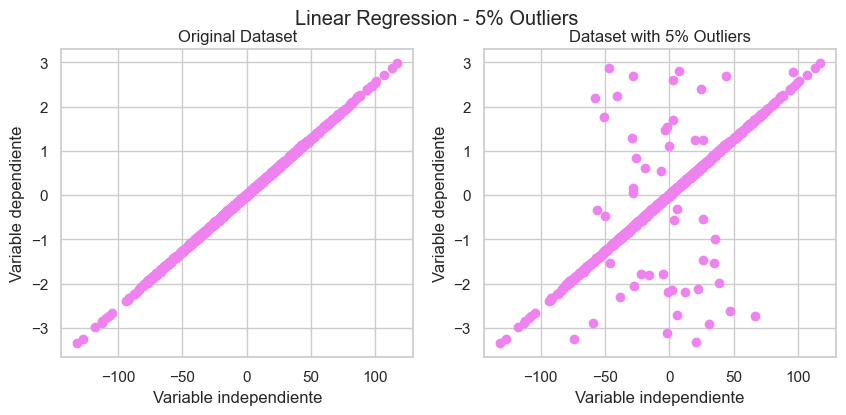

Huber Regression - 5% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 361.24950697713825


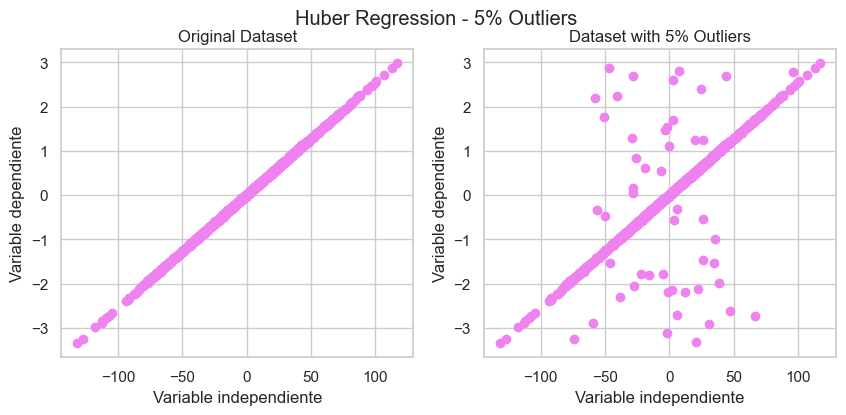

Ridge Regression - 5% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 331.60869309985793


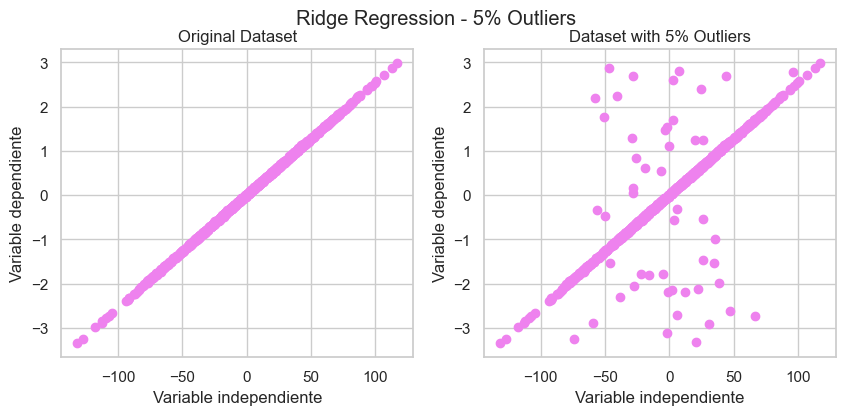

Linear Regression - 6% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 331.45257218462854


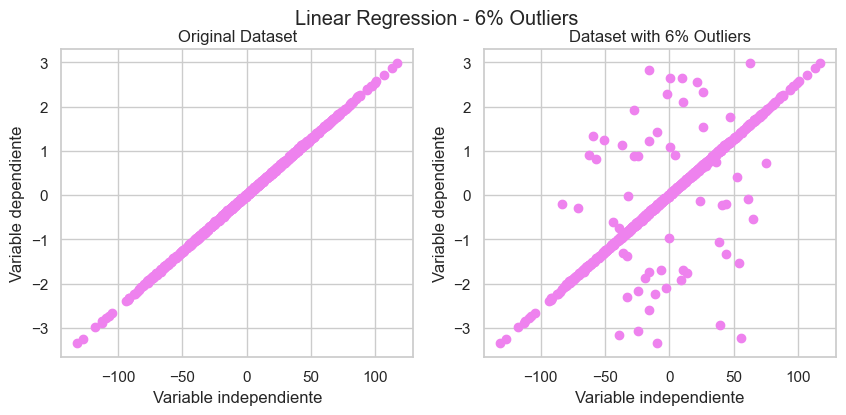

Huber Regression - 6% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 386.28540943523274


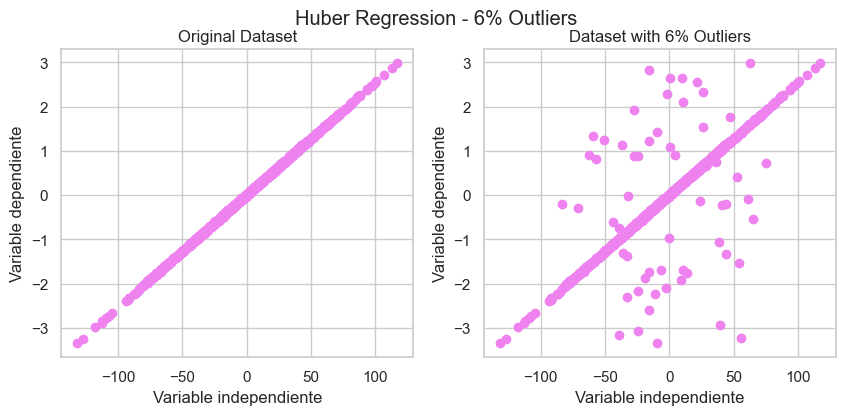

Ridge Regression - 6% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 331.3781981330199


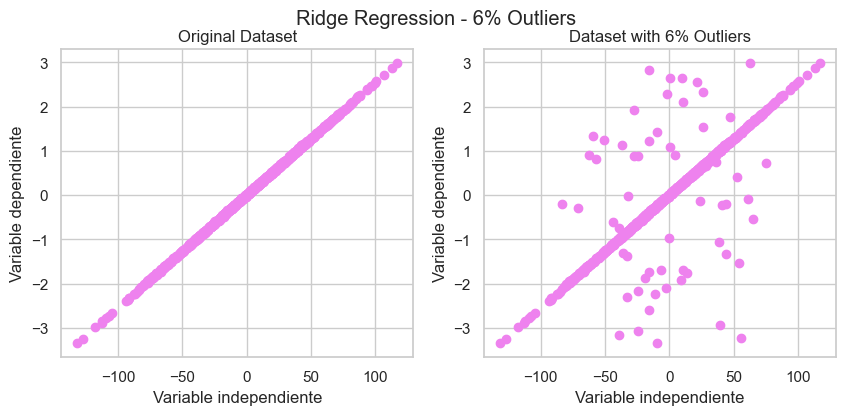

Linear Regression - 7% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 360.730712854468


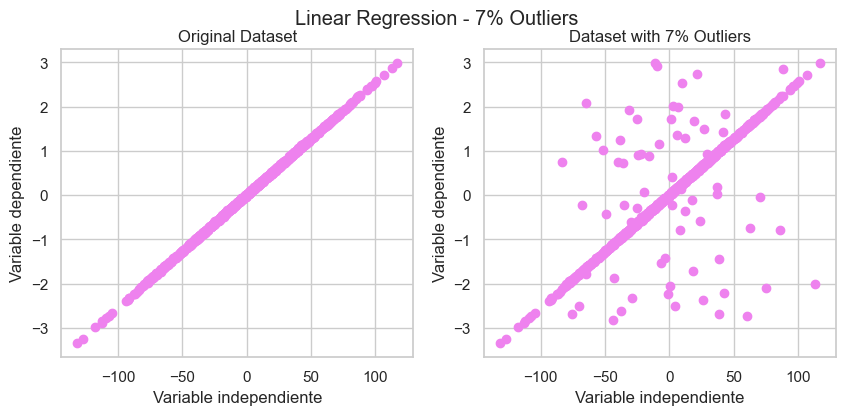

Huber Regression - 7% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 394.62391233433254


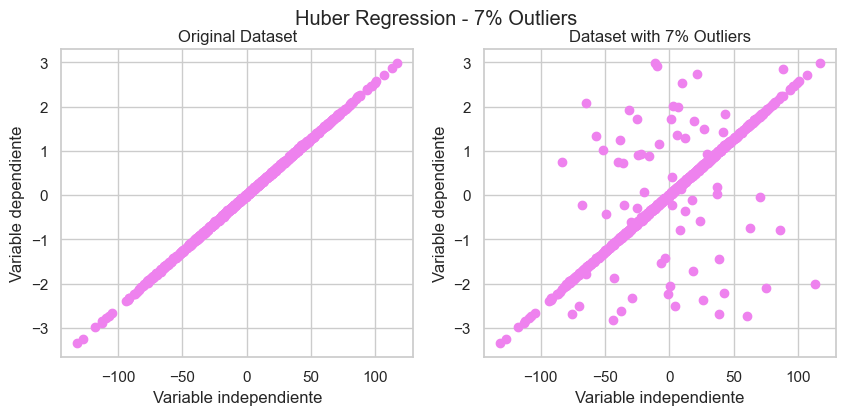

Ridge Regression - 7% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 360.856334770801


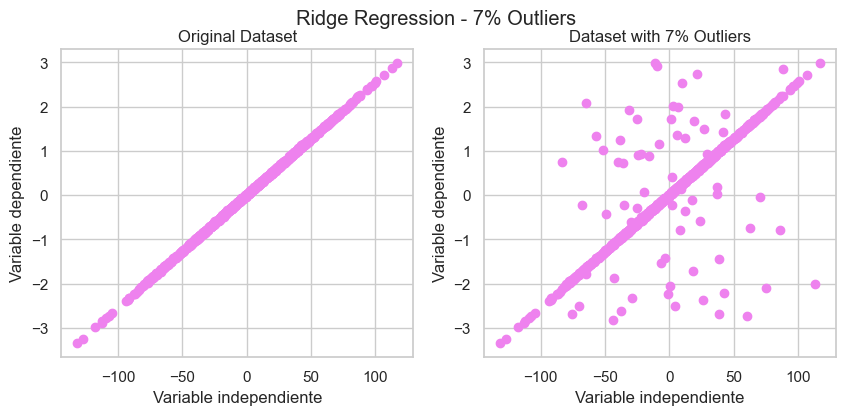

Linear Regression - 8% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 904.5910334083082


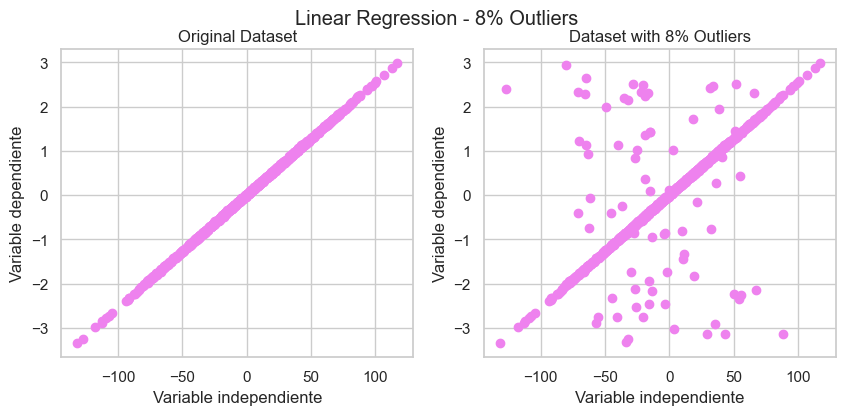

Huber Regression - 8% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 1115.6101758653306


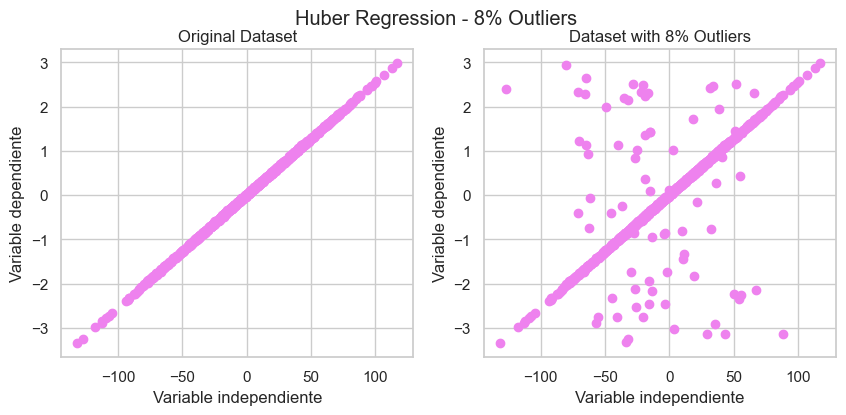

Ridge Regression - 8% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 904.276832996241


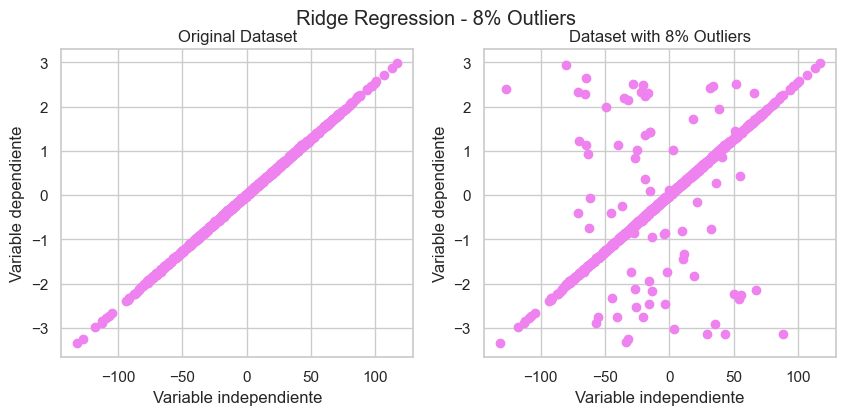

Linear Regression - 9% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 321.77067303990646


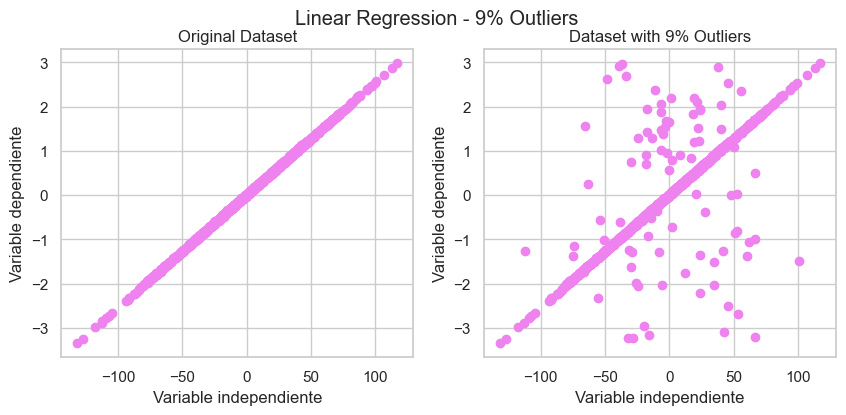

Huber Regression - 9% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 326.3162529429637


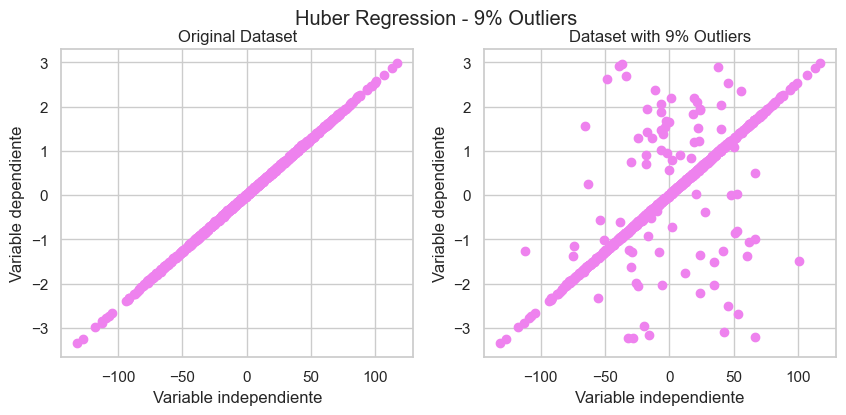

Ridge Regression - 9% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 322.12806463017154


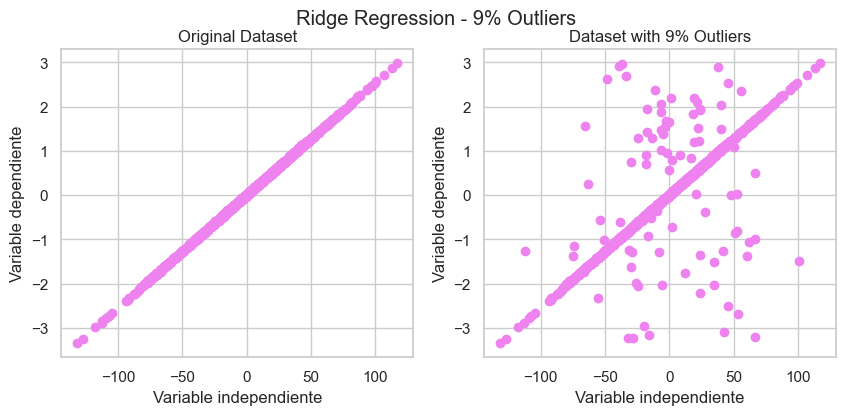

Linear Regression - 10% Outliers:
  MSE (Original): 0.2679540112335533
  MSE (With Outliers): 576.6819662187812


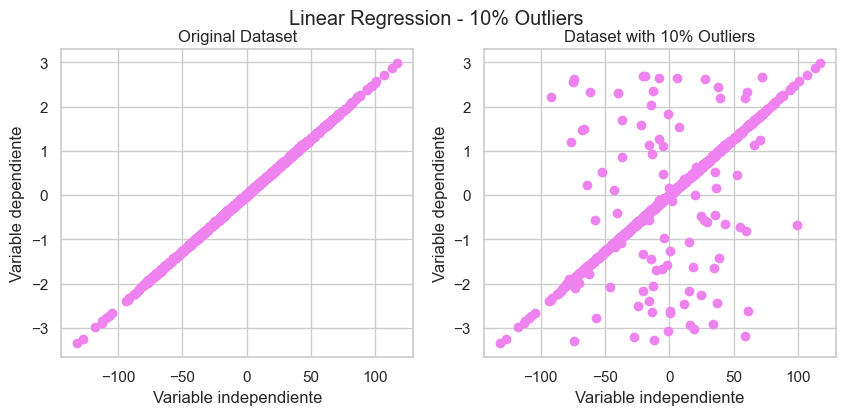

Huber Regression - 10% Outliers:
  MSE (Original): 0.2679999271542717
  MSE (With Outliers): 673.3951423997851


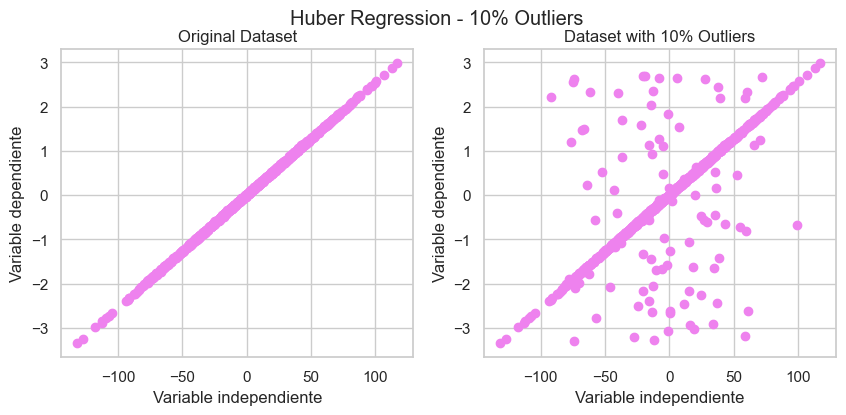

Ridge Regression - 10% Outliers:
  MSE (Original): 0.2679643500285795
  MSE (With Outliers): 576.8314310720924


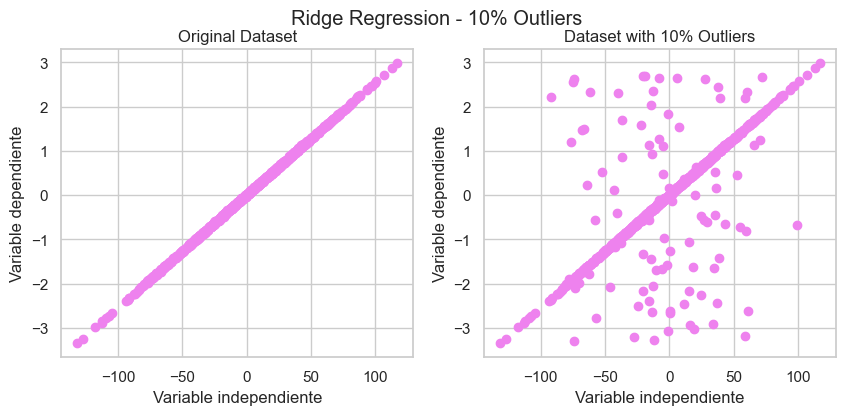

In [24]:
def plot_results(ax, X, y, title):
    ax.scatter(y, X, color='violet')
    ax.set_title(title)
    ax.set_xlabel("Variable independiente")
    ax.set_ylabel("Variable dependiente")

def plot_with_mse(model_name, mse_no_outliers, mse_outliers_1, mse_outliers_10):
    print(f"{model_name} MSE (No Outliers): {mse_no_outliers}")
    print(f"{model_name} MSE (1% Outliers): {mse_outliers_1}")
    print(f"{model_name} MSE (10% Outliers): {mse_outliers_10}")

    # Crear subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plotear dataset con outliers
    plot_results(axs[0], X, y, f"{model_name} - Dataset Without Outliers")

    # Plotear dataset con 1% outliers
    plot_results(axs[1], outliers[0]['x0'], outliers[0]['target'], f"{model_name} - Dataset With 1% Outliers")

    # Plotear dataset con 10% outliers
    plot_results(axs[2], outliers[1]['x0'], outliers[1]['target'], f"{model_name} - Dataset With 10% Outliers")

    plt.suptitle(f"{model_name} Results")
    plt.show()


def fit_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Generate dataset
dataset = generate_dataset(n_samples=1000, n_features=1, n_informative=1, n_targets=1, noise=0.5, output='dataframe')

# Generate outliers
outliers = []
percentages = [0.01, 0.1]

for percentage in percentages:
    outliers.append(generate_outliers(df=dataset, columns=['x0'], percentage=percentage, extreme_outliers=True, only_tails=False))


# Plotear dataset sin outliers
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plot_results(axs[0], dataset['x0'], dataset['target'], "Dataset Without Outliers")

# Plotear dataset con outliers
plot_results(axs[1], outliers[0]['x0'], outliers[0]['target'], "Dataset With 1% Outliers")
plot_results(axs[2], outliers[1]['x0'], outliers[1]['target'], "Dataset With 10% Outliers")

# Entrenamiento del modelo y evaluación
models = [LinearRegression(), HuberRegressor(), RidgeCV()]
model_names = ['Linear Regression', 'Huber Regression', 'Ridge Regression']

# Loop para distintos porcentajes de outliers
for percentage in range(1, 11):
    # Generar outliers con el porcentaje actual
    current_outliers = generate_outliers(df=dataset, columns=['x0'], percentage=percentage / 100, extreme_outliers=True, only_tails=False)

    # Dividir el dataset original y los outliers generados
    X_original = dataset['x0'].values.reshape((-1, 1))
    y_original = dataset['target']
    X_outliers = current_outliers['x0'].values.reshape((-1, 1))
    y_outliers = current_outliers['target']

    # Dividir el conjunto de entrenamiento y prueba para el dataset original
    X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
        X_original, y_original, test_size=0.2, random_state=42)

    # Dividir el conjunto de entrenamiento y prueba para el dataset con outliers
    X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(
        X_outliers, y_outliers, test_size=0.2, random_state=42)

    for model, name in zip(models, model_names):
        # Entrenar y evaluar el modelo en el dataset original
        mse_original = fit_and_evaluate_model(model, X_train_original, y_train_original, X_test_original, y_test_original)

        # Entrenar y evaluar el modelo en el dataset con outliers
        mse_outliers = fit_and_evaluate_model(model, X_train_outliers, y_train_outliers, X_test_outliers, y_test_outliers)

        # Imprimir resultados
        print(f"{name} - {percentage}% Outliers:")
        print(f"  MSE (Original): {mse_original}")
        print(f"  MSE (With Outliers): {mse_outliers}")

        # Plotear resultados
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))

        # Plotear dataset original
        plot_results(axs[0], X_original, y_original, "Original Dataset")

        # Plotear dataset con outliers
        plot_results(axs[1], X_outliers, y_outliers, f"Dataset with {percentage}% Outliers")

        plt.suptitle(f"{name} - {percentage}% Outliers")
        plt.show()



#### Qué sucede con cada modelo: 

_Regresión Lineal_: Es sensible a outliers, ya que intenta minimizar el error cuadrático medio.
Puede ser influenciado significativamente por puntos atípicos, lo que puede afectar negativamente su rendimiento.

_Huber Regressor_: Menos sensible a outliers en comparación con la regresión lineal estándar.
Introduce una función de pérdida robusta que atenúa el impacto de los outliers.

_Ridge Regressor_: Menos propenso a sobreajustar en presencia de outliers en comparación con la regresión lineal.
Introduce regularización L2 que puede ayudar a reducir la influencia de características atípicas.

Cabe destacar que la eficacia de estos modelos dependerá de la cantidad de outliers y de la magnitud de su efecto en los datos. En algunos casos, incluso los modelos más robustos pueden verse afectados significativamente por la presencia de outliers extremos.



## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [16]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

8.638971848995425e-07


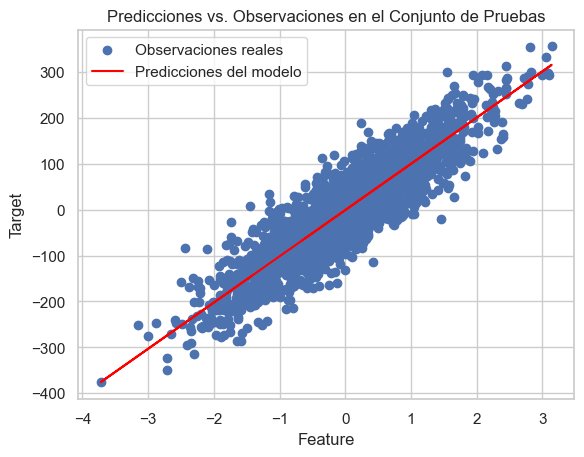

Parámetros optimizados: [ -0.74597229 100.86410718]


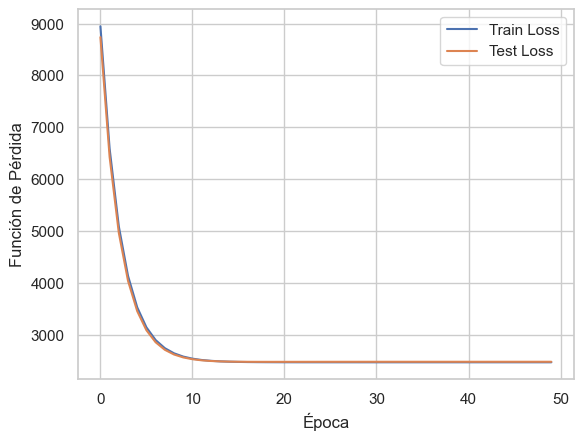

Época 1: Train Loss = 8946.657966519802, Test Loss = 8737.43841509681
Época 2: Train Loss = 6587.360965964665, Test Loss = 6426.017102849213
Época 3: Train Loss = 5087.196192218066, Test Loss = 4962.752851236569
Época 4: Train Loss = 4133.308210027355, Test Loss = 4037.4905243111366
Época 5: Train Loss = 3526.7704113807895, Test Loss = 3453.278311599756
Época 6: Train Loss = 3141.0963270039333, Test Loss = 3085.0928221541944
Época 7: Train Loss = 2895.859803988129, Test Loss = 2853.6047322713625
Época 8: Train Loss = 2739.921802868401, Test Loss = 2708.505932281736
Época 9: Train Loss = 2640.765366624867, Test Loss = 2617.914722183879
Época 10: Train Loss = 2577.714363073783, Test Loss = 2561.644426395592
Época 11: Train Loss = 2537.621667312653, Test Loss = 2526.927512362813
Época 12: Train Loss = 2512.12750841273, Test Loss = 2505.700196237448
Época 13: Train Loss = 2495.9161910789735, Test Loss = 2492.8786049455075
Época 14: Train Loss = 2485.6076280974785, Test Loss = 2485.26487352

In [17]:
from sklearn.model_selection import train_test_split
from utils.data_generation import generate_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1: Creo la funcion GD

def GD(X_train, y_train, X_test, y_test, theta_init, learning_rate, max_epochs, tol):
    # Param tol -> tolerancia para la convergencia (tol).
    # Param theta_init -> un vector de parámetros inicial.
    theta_opt = theta_init
    loss_train = []
    loss_test = []

    for epoch in range(max_epochs):
        # Calcular el gradiente
        gradients = gradient(X_train, y_train, theta_opt)

        # Actualizar los parámetros utilizando la regla de actualización del gradiente descendente.
        theta_opt = theta_opt - learning_rate * gradients
        # Actualiza los parámetros utilizando la regla del gradiente descendente.
        # Para cada parámetro en theta_opt, se resta el producto del learning_rate y
        # la correspondiente componente del gradiente.
        # Esta operación ajusta los parámetros en la dirección que minimiza la función de pérdida.

        # Calcular la función de pérdida en entrenamiento y prueba, se va agregando a la lista el resultado del costo en cada epoca.
        loss_train.append(cost_function(X_train, y_train, theta_opt))
        loss_test.append(cost_function(X_test, y_test, theta_opt))

        # Condición de frenado por número de épocas
        if epoch == max_epochs - 1:
            break

        # Condición de frenado por tolerancia
        # corta la iteracion si la diferencia entre los valores de la función de pérdida en dos épocas consecutivas es menor que la tolerancia.
        if epoch > 0 and abs(loss_train[-1] - loss_train[-2]) < tol:
            print(abs(loss_train[-1] - loss_train[-2]))
            break

    return theta_opt, loss_train, loss_test

# cost_function -> calcula el error Cuadrático Medio (MSE) para regresión lineal.
# Esta función toma la matriz de características X, el vector de observaciones y,
# y el vector de parámetros theta como entrada, calcula las predicciones del modelo "y_hat",
# y luego calcula el MSE como la suma de los cuadrados de las diferencias entre las predicciones
# y las observaciones dividido por el número de observaciones.


def cost_function(X, y, theta):
    N = len(y)
    y_hat = X.dot(theta)
    mse = np.sum((y_hat - y) ** 2) / N

    return mse

# 2: genero el dataset
samples = 10000
dataset = generate_dataset(
    n_samples=samples,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=50,
    output='dataframe'
)
# Separar las características (X) y la variable objetivo (y)
# Features / tambien como X = dataset['x0'].values.reshape((-1, 1))
X = dataset[['x0']].values
y = dataset['target'].values  # Target, variable dependiente

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Aseguro de que X_train y X_test tengan una columna de unos para el término de intersección (de sesgo)
X_train = np.column_stack([np.ones(len(X_train)), X_train])
X_test = np.column_stack([np.ones(len(X_test)), X_test])

# 3: Inicializamos un vector (β₀, β₁) al azar
theta_init = np.random.rand(2)  # valores entre 0 y 1

# 4: Calculamos los mejores parámetros con el algoritmo de gradiente descendente
learning_rate = 0.1  # alpha
max_epochs = 1000
tolerance = 1e-6

theta_opt, loss_train, loss_test = GD(
    X_train, y_train, X_test, y_test, theta_init, learning_rate, max_epochs, tolerance)

# Realizar predicciones en el conjunto de prueba
y_pred = X_test.dot(theta_opt)

# Crear un gráfico de dispersión para visualizar las predicciones vs. observaciones reales
plt.scatter(X_test[:, 1], y_test, label='Observaciones reales')
plt.plot(X_test[:, 1], y_pred, color='red', label='Predicciones del modelo')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Predicciones vs. Observaciones en el Conjunto de Pruebas')
plt.legend()
plt.show()

print("Parámetros optimizados:", theta_opt)

plt.plot(range(len(loss_train)), loss_train, label='Train Loss')
plt.plot(range(len(loss_test)), loss_test, label='Test Loss')
plt.xlabel('Época')
plt.ylabel('Función de Pérdida')
plt.legend()
plt.show()

# más información sobre cómo están cambiando las funciones de pérdida durante el entrenamiento.
def loss_function_during_training(loss_train, loss_test):
    for epoch, (train_loss_value, test_loss_value) in enumerate(zip(loss_train, loss_test)):
        print(
            f"Época {epoch + 1}: Train Loss = {train_loss_value}, Test Loss = {test_loss_value}")


loss_function_during_training(loss_train,loss_test)

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [32]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler    

# Función de descenso de gradiente estocástico (SGD)
def SGD(X_train, y_train, X_test, y_test, learning_rate, max_epochs, beta_init, tolerance):
    train_losses = []
    test_losses = []
    beta = beta_init.copy()

    for epoch in range(max_epochs):
        # Shuffle the training data
        rand_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[rand_idx]
        y_train_shuffled = y_train[rand_idx]

        for i in range(len(X_train_shuffled)):
            xi = X_train_shuffled[i]
            yi = y_train_shuffled[i]

            # Reshape xi and beta for matrix multiplication
            xi = xi.reshape(1, -1)
            beta = beta.reshape(-1, 1)

            gradient = 2 * xi.T.dot(xi.dot(beta) - yi)
            beta -= learning_rate * gradient

        # Calculate training loss
        train_loss = loss_function(X_train, y_train, beta)
        train_losses.append(train_loss)

        # Calculate test loss
        test_loss = loss_function(X_test, y_test, beta)
        test_losses.append(test_loss)

        # Check for convergence
        if epoch > 0 and abs(train_losses[-1] - train_losses[-2]) < tolerance:
            break

    return beta, train_losses, test_losses

# Función para calcular la función de pérdida (Error Cuadrático Medio)
def loss_function(X, y, beta):  
    y_pred = X.dot(beta)
    error = y_pred - y
    loss = np.mean(error ** 2)
    return loss

# Define una función para la superficie
def surface_function(beta0, beta1, X, y):
    # Calcula las predicciones del modelo
    predictions = X.dot(np.array([beta0, beta1]))
    
    # Calcula la pérdida cuadrática media
    mse = np.mean((predictions - y)**2)
    
    return mse


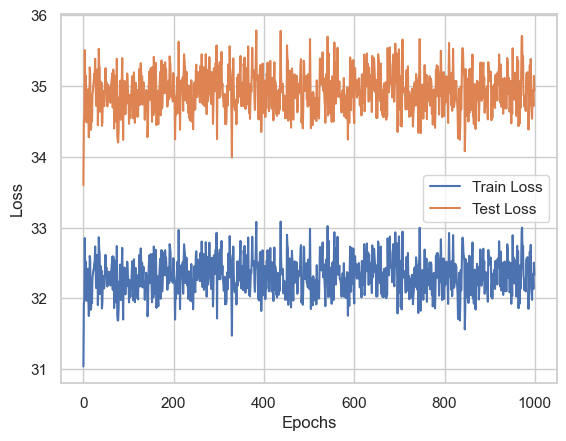

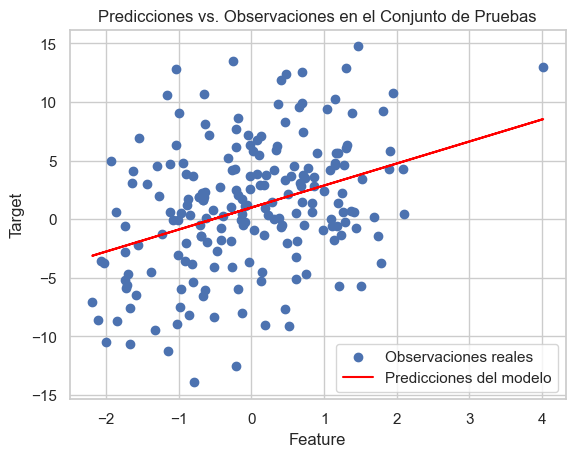

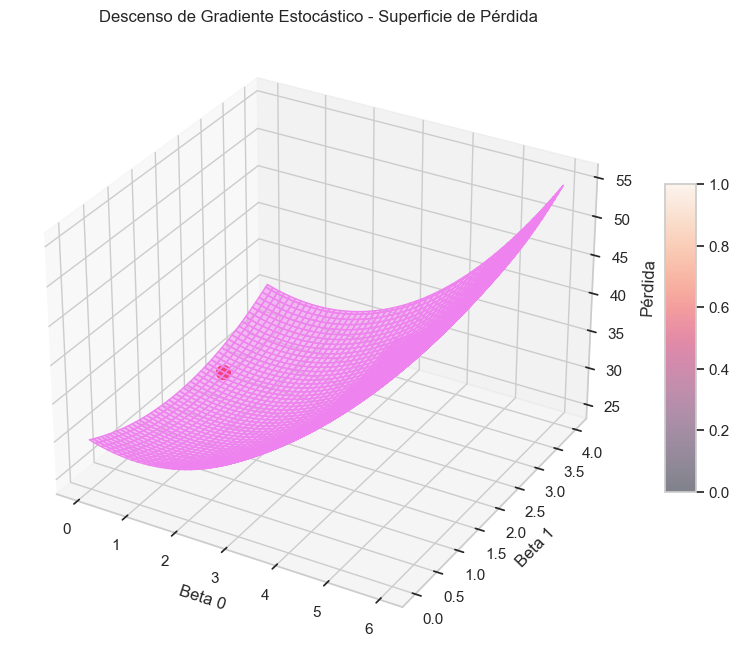

In [64]:
# 2: genero el dataset
# Inicialización de los parámetros beta al azar

samples = 1000
dataset = generate_dataset(
    n_samples=samples,
    n_features=1,
    n_informative=2,
    n_targets=1,
    noise=5.0,
    bias=1.0,
    output='dataframe'
)

# Separar las características (X) y la variable objetivo (y)
X = dataset[['x0']].values
y = dataset['target'].values  # Target, variable dependiente

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aseguro de que X_train y X_test tengan una columna de unos para el término de intersección (de sesgo)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Parámetros de entrenamiento
learning_rate = 0.001 #probando con 0.1 / 0.5 casi que no hay convergencia
max_epochs = 1000
tolerance = 1e-6
beta_init = np.zeros(X_train_bias.shape[1])

learned_beta, train_losses, test_losses = SGD(X_train_bias, y_train, X_test_bias, y_test, learning_rate, max_epochs, beta_init, tolerance)

# Visualización de las funciones de pérdida
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calcular predicciones en el conjunto de prueba
y_pred = X_test_bias.dot(learned_beta)

# Plotear predicciones vs. observaciones reales
plt.scatter(X_test[:, 0], y_test, label='Observaciones reales')  # Usar [:, 0] en lugar de [:, 1]
plt.plot(X_test_bias[:, 1], y_pred, color='red', label='Predicciones del modelo')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Predicciones vs. Observaciones en el Conjunto de Pruebas')
plt.legend()
plt.show()


# Crea una malla de valores para beta0 y beta1
beta0_vals = np.linspace(0, 6, 100)
beta1_vals = np.linspace(0, 4, 100)
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)

# Calcula la función de pérdida para cada combinación de beta0 y beta1 en la malla
loss_surface = np.array([[surface_function(b0, b1, X_train_bias, y_train) for b0, b1 in zip(row_b0, row_b1)] for row_b0, row_b1 in zip(beta0_mesh, beta1_mesh)])

# Crea el gráfico 3D surface con gradiente de colores
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ajusta la transparencia para crear el gradiente de colores
surf = ax.plot_surface(beta0_mesh, beta1_mesh, loss_surface, color='violet', alpha=0.5, facecolors=plt.cm.viridis(loss_surface / np.max(loss_surface)))

# Agrega puntos para mostrar la trayectoria del descenso de gradiente
ax.scatter(learned_beta[0], learned_beta[1], min(train_losses), color='red', s=100, label='Punto de convergencia')

# Configura las etiquetas
ax.set_xlabel('Beta 0')
ax.set_ylabel('Beta 1')
ax.set_zlabel('Pérdida')
ax.set_title('Descenso de Gradiente Estocástico - Superficie de Pérdida')

# Añade la barra de colores
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Muestra el gráfico
plt.show()





Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?


Gradiente Descendente (GD): En GD, se calcula el gradiente utilizando el conjunto de datos completo en cada iteración. Esto significa que se ajustan los parámetros del modelo basándose en el promedio de todos los ejemplos de entrenamiento en cada paso.

Gradiente Descendente Estocástico (SGD): En SGD, se utiliza un solo ejemplo de entrenamiento (o un pequeño lote) para calcular el gradiente y actualizar los parámetros en cada iteración. Esto introduce estocasticidad en la actualización de parámetros, lo que puede hacer que el entrenamiento sea más rápido y menos propenso a atascarse en mínimos locales, pero también puede hacer que la convergencia sea más ruidosa.

#### 1. Comportamiento de los Algoritmos
El comportamiento de GD y SGD puede variar según el conjunto de datos y la configuración del modelo. En general, SGD puede converger más rápidamente en términos de tiempo de cómputo por iteración, pero también puede ser más ruidoso debido a las actualizaciones basadas en ejemplos individuales.

#### 2. Efecto del Learning Rate
El learning rate es un hiperparámetro crítico en estos algoritmos. Si el learning rate es demasiado alto, los algoritmos pueden no converger o pueden oscilar alrededor del mínimo global. Si es demasiado bajo, la convergencia puede ser lenta. Es común realizar ajustes iterativos para encontrar un learning rate adecuado.

#### 3. Comparación en una Curva de Pérdida vs Epoch
Podemos visualizar la convergencia de los algoritmos observando la curva de pérdida en función de las iteraciones (epochs) luego del desarrollo del SGD y SG respectivamente. 

### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria.
La implementación de la misma podemos considerar la siguiente:

In [83]:
from sklearn.impute import SimpleImputer


class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)

        # Escalado de características
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Imputación de valores faltantes
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)

        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad
    
    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        np.random.seed(self.random_state)

        for epoch in range(self.max_iter):
            # Shuffle the data
            indices = np.random.permutation(len(y))
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            total_loss = 0
            total_grad = 0

            for i in range(len(y)):
                X_sample = X_shuffled[i:i + 1]
                y_sample = y_shuffled[i:i + 1]

                loss, grad = self._step(X_sample, y_sample)
                total_loss += loss
                total_grad += grad

                self.weights -= self.lr * grad.flatten()  

            avg_loss = total_loss / len(y)

            self.loss_history.append(avg_loss)
            self.grad_history.append(np.linalg.norm(total_grad))

            if epoch > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Average Loss: {avg_loss}")

        self.theta_history.append(self.weights)


    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        raw_scores = X.dot(self.weights)
        # Clip the raw scores to prevent overflow
        clipped_scores = np.clip(raw_scores, -500, 500)
        return 1 / (1 + np.exp(-clipped_scores))    
    
    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    
    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria.
La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método `SGD` de la clase `LogisticRegressionSGD` y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

X,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [86]:
# Definir la grilla de hiperparámetros
param_grid = {
    'lr': [0.0001, 0.001, 0.01, 0.1],  # Cambiar lr a alpha (tasa de regularización)
    'max_iter': [500, 1000, 1500, 2000],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

best_score = 0
best_params = {}
# Iterar sobre la grilla
for params in ParameterGrid(param_grid):
    model = LogisticRegressionSGD(**params)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    # Actualizar los mejores hiperparámetros si se encuentra un modelo mejor
    if score > best_score:
        best_score = score
        best_params = params

print("Mejores hiperparámetros:", best_params)
print("Precisión en el conjunto de prueba:", best_score)

Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 200, Average Loss: 0.11470081760315717
Epoch 300, Average Loss: 0.09717891629485316
Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 0, Average Loss: 2.4685888024614218
Epoch 0, Average Loss: 2.4685888024614218
Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 200, Average Loss: 0.11470081760315717
Epoch 300, Average Loss: 0.09717891629485316
Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 0, Average Loss: 2.4685888024614218
Epoch 0, Average Loss: 2.4685888024614218
Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 200, Average Loss: 0.11470081760315717
Epoch 300, Average Loss: 0.09717891629485316
Epoch 0, Average Loss: 2.4685888024614218
Epoch 100, Average Loss: 0.20529911753748206
Epoch 0, Average Loss: 2.468588802461421